## Craft a Story from a Dataset

### In this exercise, you will make like your great data storyteller forebears and tell a compelling story about a dataset of interest to you. You'll put together a Jupyter Notebook or PowerPoint and then present your findings to your mentor. 

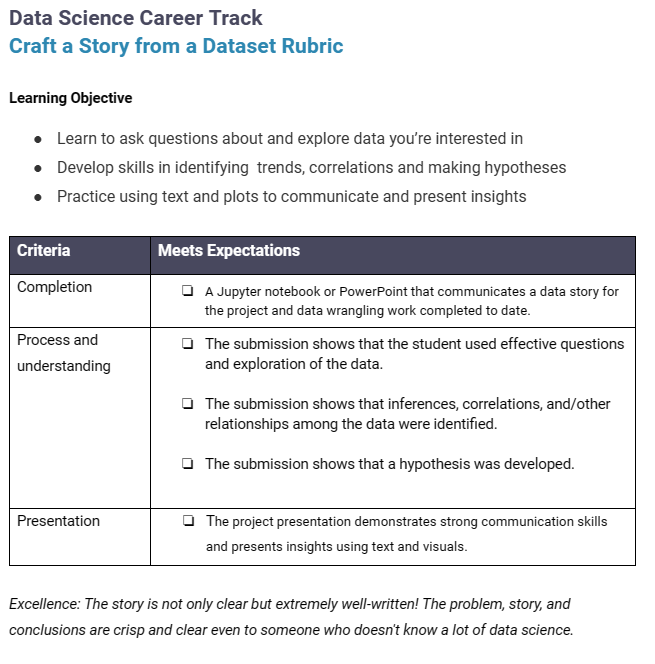

### While some employee turnover is natural, understanding and managing employee attrition effectively is crucial for maintaining a healthy and successful company.
### Some of the negative aspects of employee attrition are: 
### Impact on Morale and Culture: High attrition rates can create a negative work environment, affecting employee morale and organizational culture. It may lead to decreased job satisfaction and loyalty among remaining staff.
### Financial Costs: Attrition results in costs related to recruitment, training, and onboarding new employees. High turnover can strain a company’s budget and resources.
### Loss of Institutional Knowledge: Departing employees take with them valuable institutional knowledge, experience, and skills. Losing this expertise can hinder organizational performance and decision-making.
### Disruptions to Productivity: Frequent attrition can disrupt team dynamics, affect collaboration, and reduce overall productivity. New employees need time to adapt, impacting team efficiency.
### Revenue Generation: Attrition can directly and indirectly impact revenue. If projects are delayed or customer satisfaction drops, it may affect sales and client retention.
### Therefore it is important to minimize the impact of employee attrition by identifying the factors that cause employees to want to leave an organization. 

### Using an open source data set of employee attrition, attempt to determine if this data set allows one to determine if an employee is likely to quit and which features are more likely to influence that decision. 

#### Data Source: 
https://www.kaggle.com/datasets/patelprashant/employee-attrition

### Import libraries


In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Customize notebook with jupyterthemes
from jupyterthemes import jtplot as jt
jt.style(theme = 'grade3', context = 'notebook', ticks = True, grid = False)

In [2]:
from imblearn.metrics import classification_report_imbalanced

### Read Data


In [3]:
# Read the file into a dataframe
# hr_df = pd.read_excel("Employee_Attrition.xlsx")
hr_df = pd.read_csv("employee_data.csv", header=0)

### Initial Analysis
- Any missing elements that need to be fixed
- Fix data issues


In [4]:
# Check the data and column names
hr_df.head()

,Age,Attrition,BUSINESSTRAVEL,DailyRate,DEPARTMENT,DistanceFromHome,Education,EDUCATIONFIELD,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Column names are not consistent, rename column names so they are all consistent
hr_df.rename(columns = {'BUSINESSTRAVEL':'BusinessTravel','DEPARTMENT':'Department','EDUCATIONFIELD':'EducationField','GENDER':'Gender','JOBROLE':'JobRole','MARITALSTATUS':'MaritalStatus' }, inplace = True)

In [6]:
# Verify the rename 
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Check number of rows/columns
hr_df.shape

(1470, 35)

In [8]:
# Check for null values
hr_df.isnull().values.any()

False

In [9]:
# Another method to check for null values
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# Another check for null values
hr_df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Count of unique values in each column
hr_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
# Appears that columns EmployeeCount, Over18 and StandardHours all contain only 1 value
# Also, the EmployeeNumber is just an ID so it can be dropped

In [12]:
# Before we drop verify EmployeeCount values are the same for all employees
print(hr_df['EmployeeCount'].nunique())
print(hr_df['EmployeeCount'].unique())

1
[1]


In [14]:
# Before we drop verify Over18 values are the same for all employees
print(hr_df['Over18'].nunique())
print(hr_df['Over18'].unique())

1
['Y']


In [15]:
# Before we drop verify StandardHours values are the same for all employees
print(hr_df['StandardHours'].nunique())
print(hr_df['StandardHours'].unique())

1
[80]


In [16]:
hr_df = hr_df.drop(columns=['EmployeeNumber','EmployeeCount','Over18','StandardHours'])

In [17]:
# Verify 4 columns dropped
hr_df.shape

(1470, 31)

### Exploratory Phase
- Get data statistics 
- Visualize the data

In [18]:
# determine data types by column
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [19]:
# Which columns are considered numeric, we need to exclude them later for the one hot encoding
hr_df.select_dtypes(include='int64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
# Which columns are considered categorical, we need this info later for the encoding
hr_df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [21]:
# How manu numerical features
len(hr_df.select_dtypes(include='int64').columns)

23

In [22]:
# get df stats
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
# see all the columns with descriptive stats
pd.set_option('display.max_columns', None)
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [24]:
# random sample of the df
hr_df.sample(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
705,39,No,Travel_Rarely,903,Sales,2,5,Life Sciences,1,Male,41,4,3,Sales Executive,3,Single,7880,2560,0,No,18,3,4,0,9,3,3,8,7,0,7
1433,25,No,Travel_Rarely,1382,Sales,8,2,Other,1,Female,85,3,2,Sales Executive,3,Divorced,4907,13684,0,Yes,22,4,2,1,6,3,2,5,3,0,4
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
1159,39,No,Travel_Frequently,711,Research & Development,4,3,Medical,1,Female,81,3,2,Manufacturing Director,3,Single,5042,3140,0,No,13,3,4,0,10,2,1,9,2,3,8
252,29,No,Travel_Rarely,665,Research & Development,15,3,Life Sciences,3,Male,60,3,1,Research Scientist,4,Single,2340,22673,1,No,19,3,1,0,6,1,3,6,5,1,5
904,48,No,Travel_Rarely,715,Research & Development,1,3,Life Sciences,4,Male,76,2,5,Research Director,4,Single,18265,8733,6,No,12,3,3,0,25,3,4,1,0,0,0
676,35,No,Travel_Rarely,1137,Research & Development,21,1,Life Sciences,4,Female,51,3,2,Healthcare Representative,4,Married,4014,19170,1,Yes,25,4,4,1,10,2,1,10,6,0,7


In [25]:
# Get a count of the target variable values
emp_stayed = (hr_df.Attrition == 'No').sum()
emp_left   = (hr_df.Attrition == 'Yes').sum()

print("Count of Employees who stayed: ", emp_stayed)
print("Count of Employees who left: ",   emp_left  )

Count of Employees who stayed:  1233
Count of Employees who left:  237


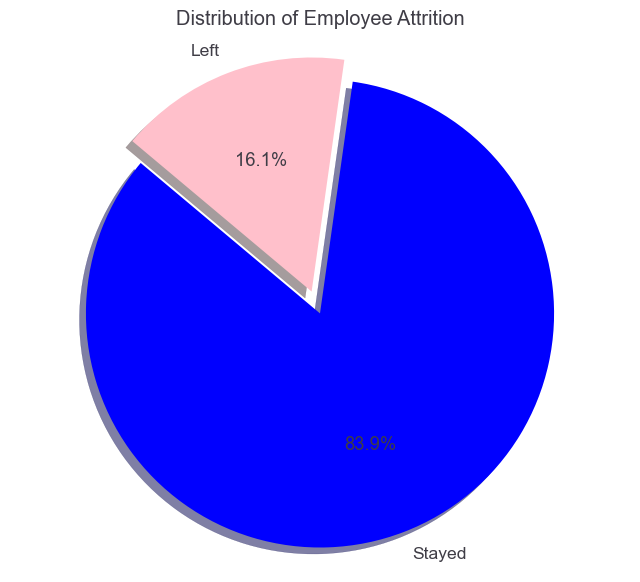

In [26]:
# Create a pie chart
labels = ['Stayed', 'Left']
sizes = [emp_stayed, emp_left]
colors = ['blue', 'pink'] 
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 

# Add a title
plt.title('Distribution of Employee Attrition')

# Show the pie chart
plt.show()

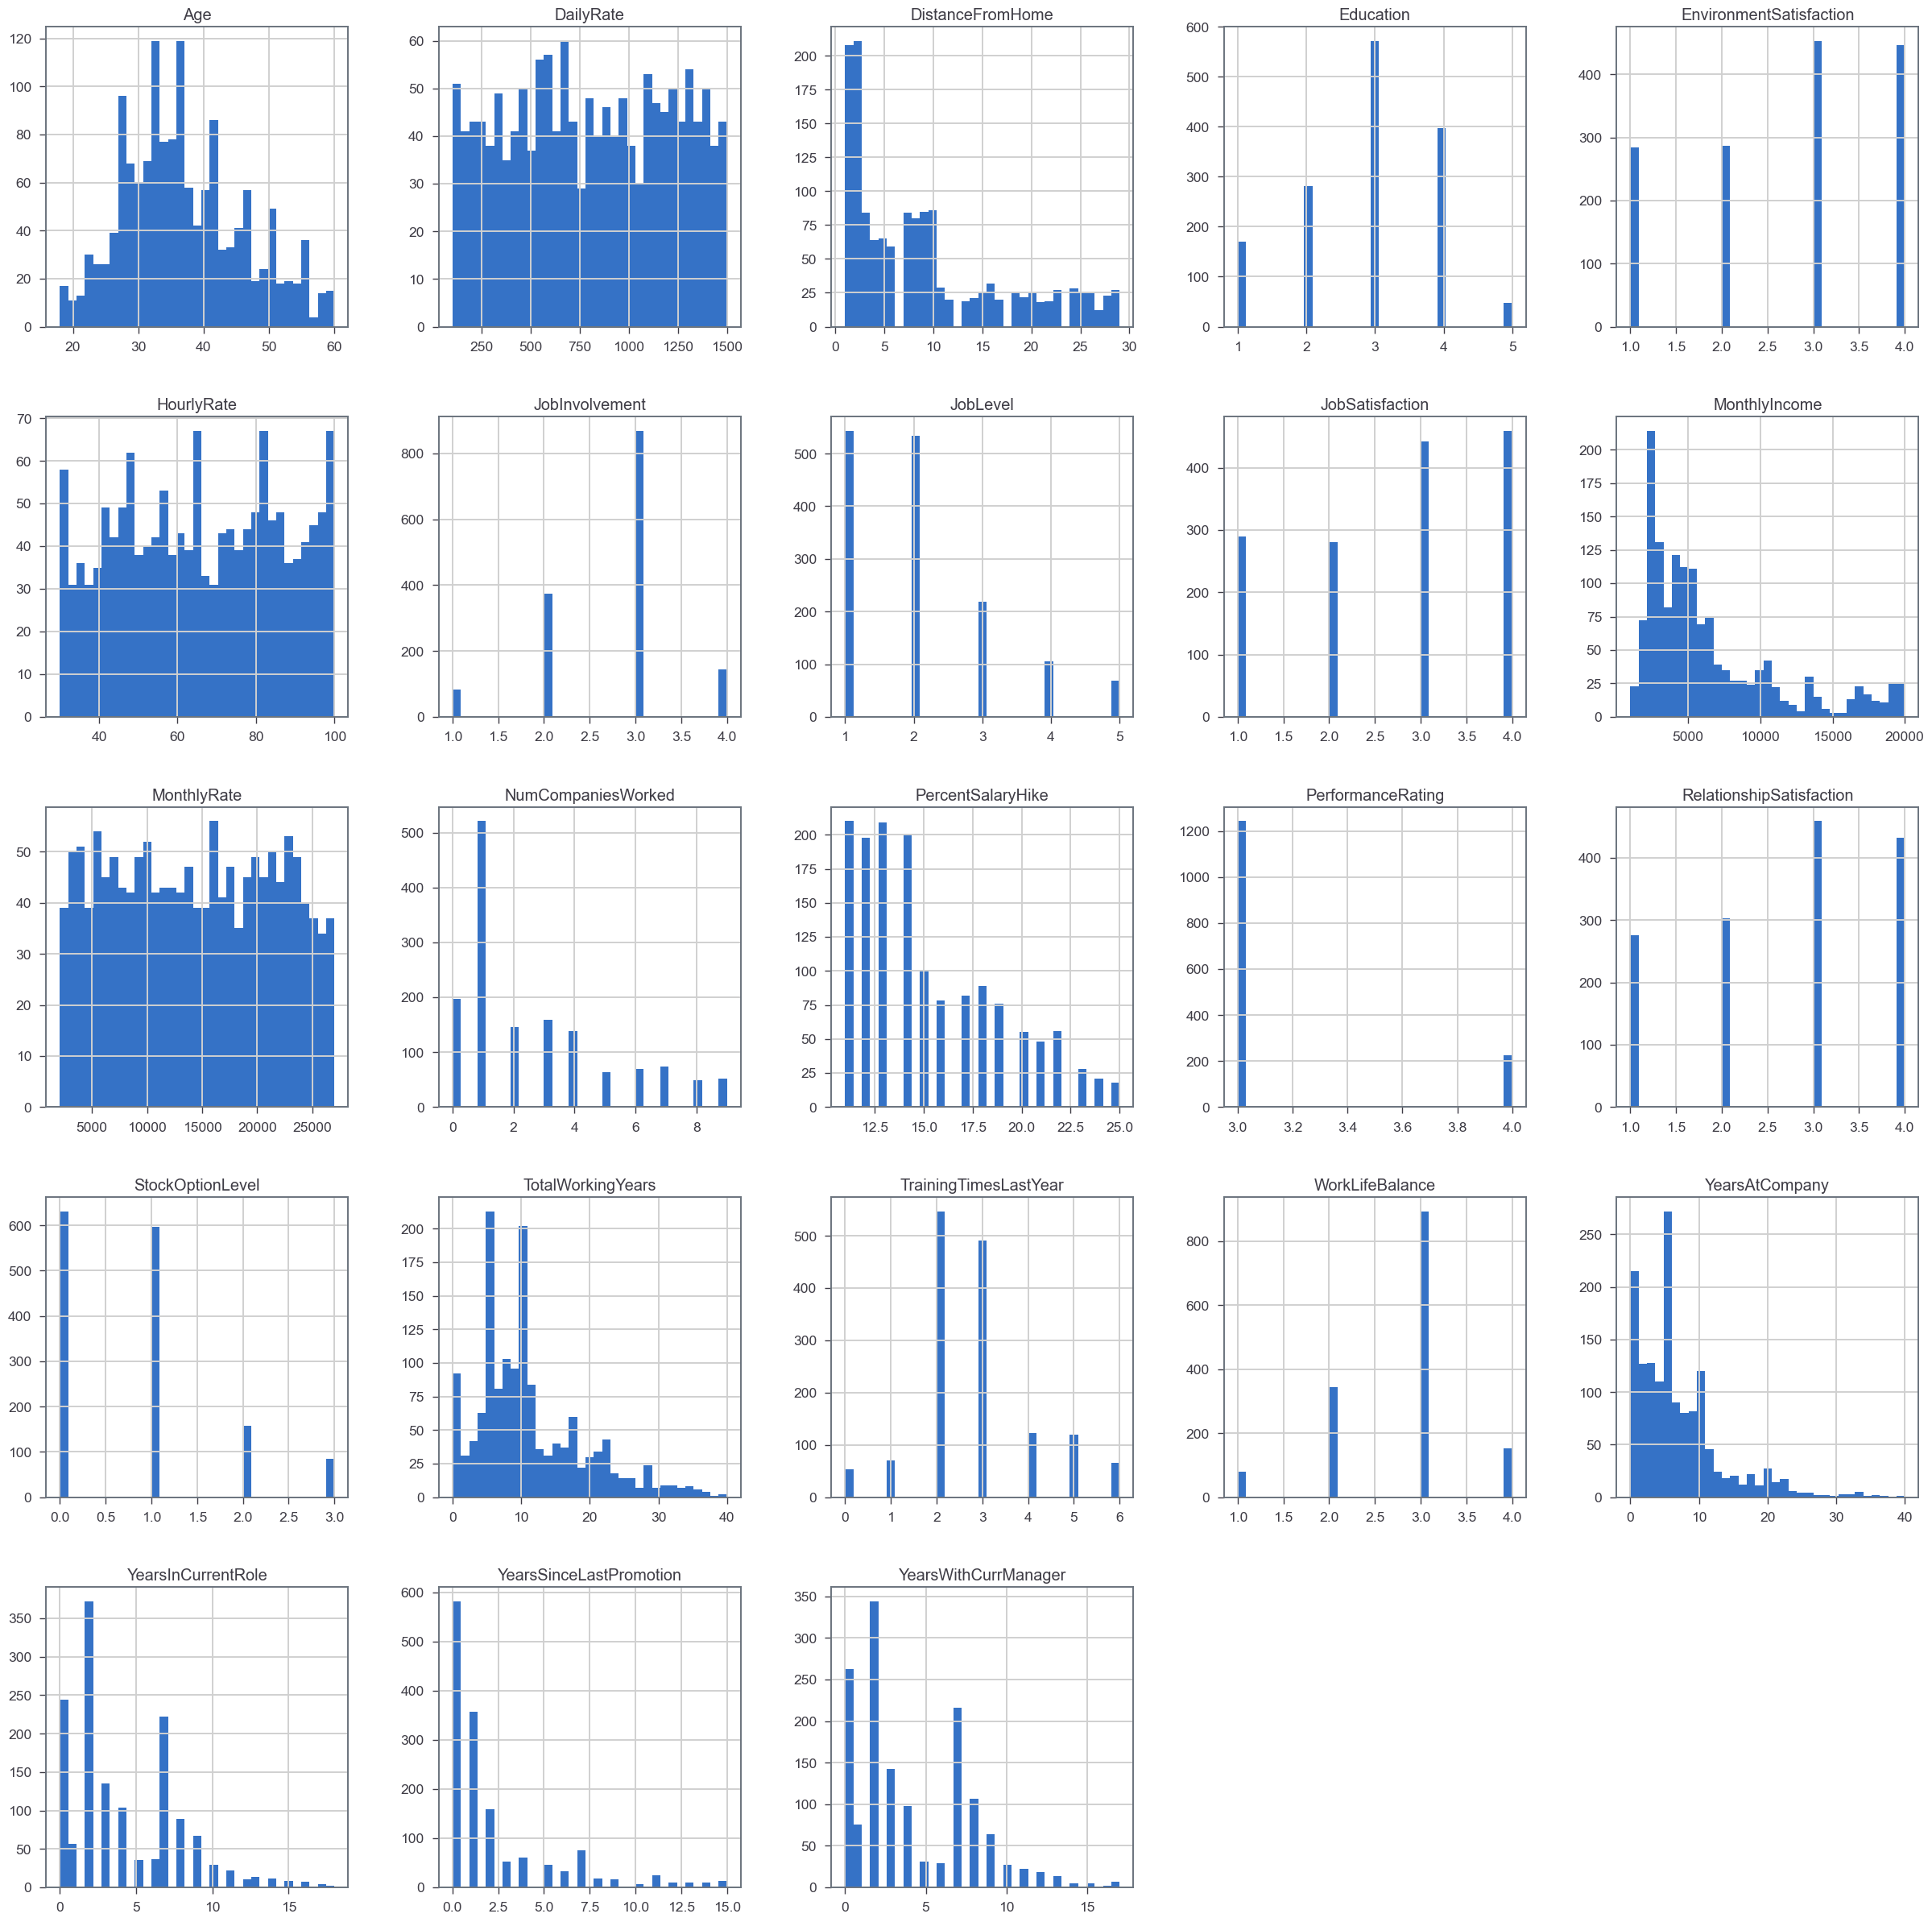

In [27]:
# Examine the distribution of the numerical features
hr_df.hist(bins = 33, figsize = (30,30), color = 'b');

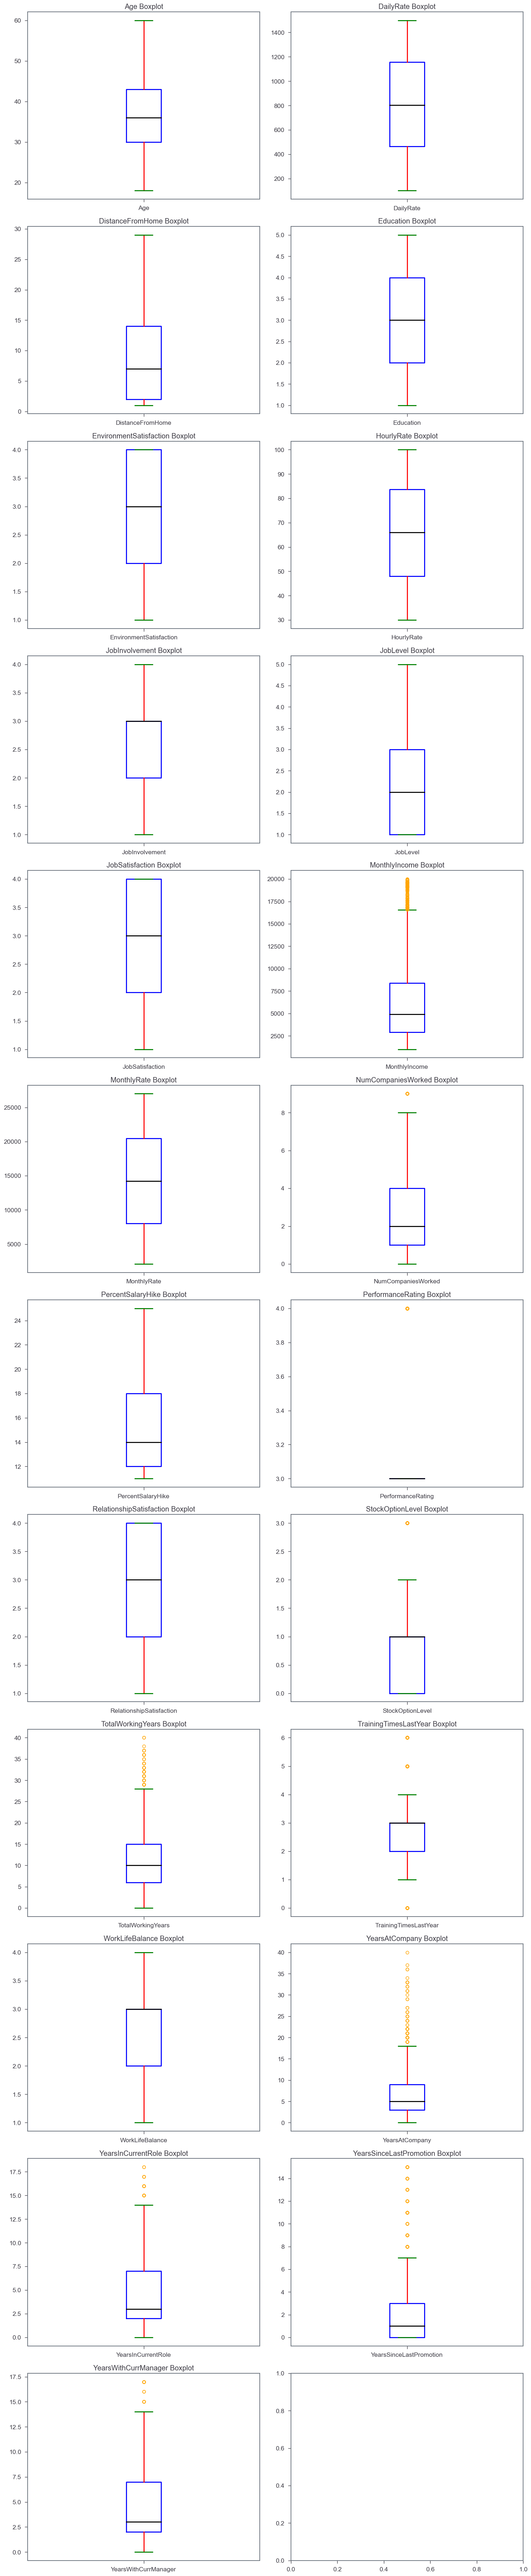

In [28]:
# Examine the distribution of the numerical features using a boxplot
col_names = hr_df.select_dtypes(include='int64').columns
BP_color = 'blue'
W_color = 'red'
M_color = 'black'
C_color = 'green'
F_color = 'orange'

num_plots = len(col_names)
num_cols = 2  # Number of columns for subplots
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))
for idx, col in enumerate(col_names):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    hr_df[col].plot(kind='box', title=col + ' Boxplot', ax=ax,
                    boxprops=dict(linewidth=2, color=BP_color),
                    capprops=dict(linewidth=2, color=C_color),
                    whiskerprops=dict(linewidth=2, color=W_color),
                    flierprops=dict(color=F_color, markeredgecolor=F_color),
                    medianprops=dict(linewidth=2, color=M_color))
plt.tight_layout()
plt.show()

In [29]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='Department', ylabel='count'>

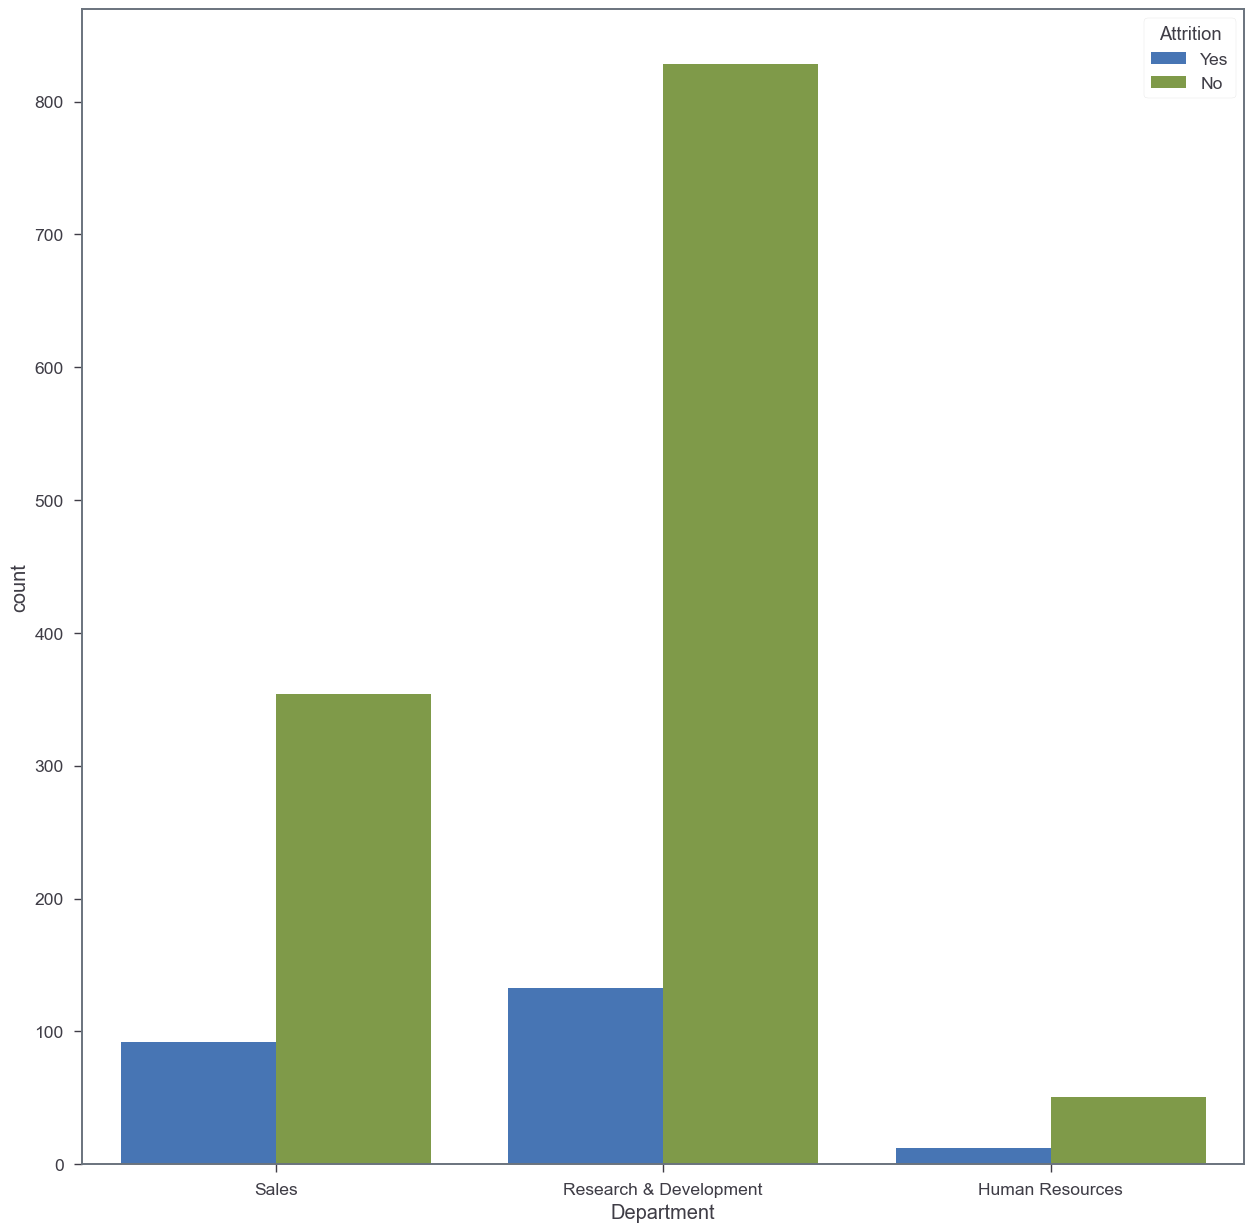

In [30]:
# Plot attrition by department
plt.figure(figsize=[15,15])
plt.subplot(111)
sns.countplot(x = 'Department', hue = 'Attrition', data = hr_df)

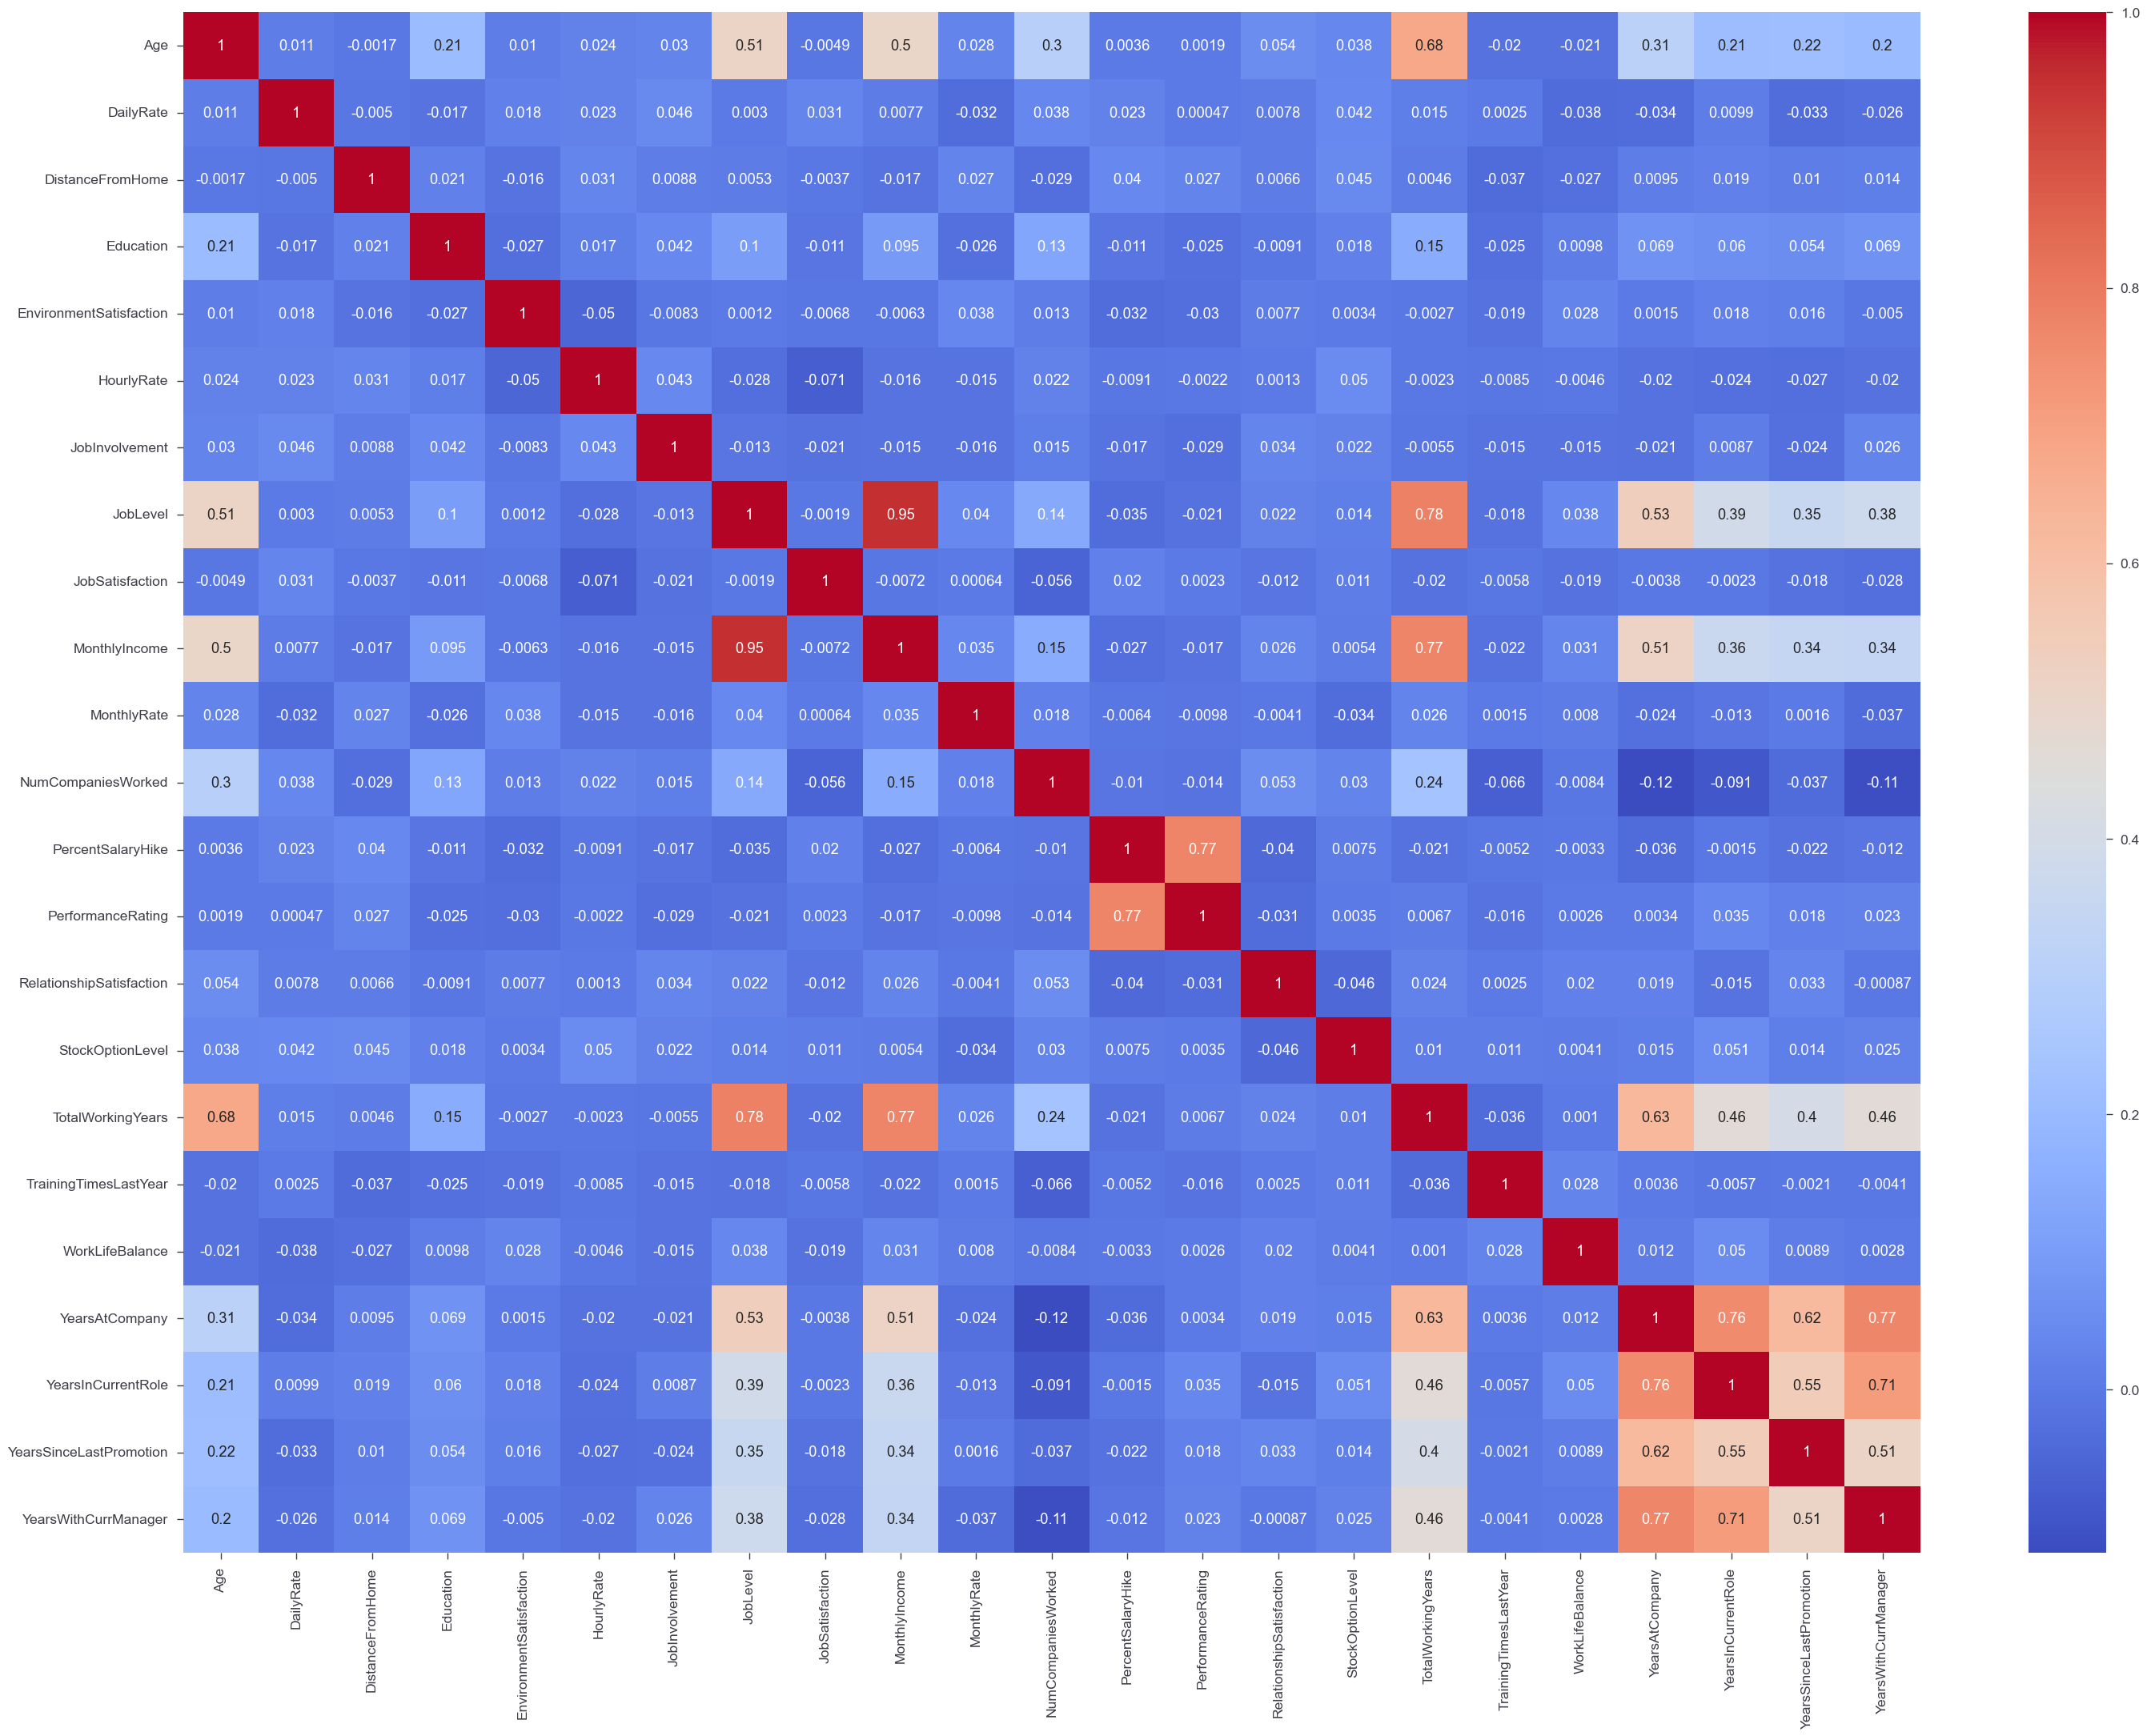

In [31]:
import seaborn as sns
# Examine correlations between features
correlation_matrix = hr_df[col_names].corr()
plt.figure(figsize=(35, 25))
heat_map = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' )

### Transform Phase
- One hot encoding
- Reduction/Scaling


In [32]:
# Before OneHotEncoder check the number of rows and columns
hr_df.shape

(1470, 31)

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Generate categorical variable list
hr_cat = hr_df.dtypes[hr_df.dtypes == "object"].index.tolist()

# Check unique values
print(hr_df[hr_cat].nunique())

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64


In [34]:
# One Hot Encoding
# Create a DataFrame containing only categorical columns
hr_cat_df = hr_df[hr_cat]

# Drop any rows with missing values
hr_cat_df.dropna(inplace=True)

# Instantiate OneHotEncoder
enc = OneHotEncoder()

# Fit and transform the categorical DataFrame
hr_encode = pd.DataFrame(enc.fit_transform(hr_cat_df).toarray())

# Get the names of the new encoded columns
encoded_columns = enc.get_feature_names_out(hr_cat)

# Assign the column names to the encoded DataFrame
hr_encode.columns = encoded_columns

# Concatenate the encoded DataFrame with the original DataFrame
hr_df_encoded = pd.concat([hr_df.drop(columns=hr_cat), hr_encode], axis=1)

# Check the shape of the encoded DataFrame
print(hr_df_encoded.shape)

(1470, 53)


C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_23280\626287627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_cat_df.dropna(inplace=True)


In [35]:
hr_df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
hr_df_encoded.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Repr

In [37]:
# After OneHotEncoder check the number of rows and columns and the length, which should be 0
#   if all categorical columns are encoded
print(hr_df_encoded.shape)
print(len(hr_df_encoded.select_dtypes(include = "object").columns))

(1470, 53)
0


In [38]:
# split data into feature/target
y = hr_df_encoded['Attrition_Yes'].values
# X = hr_df_encoded.drop(['Attrition_Yes', 'Attrition_No'], axis=1)
X = hr_df_encoded.drop(columns=['Attrition_Yes', 'Attrition_No'])
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [39]:
print(y)

[1. 0. 1. ... 0. 0. 0.]


In [40]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=78)

In [41]:
print("X_train {}".format(X_train.shape))
print("X_test {}".format(X_test.shape))
print("y_train {}".format(y_train.shape))
print("y_test {}".format(y_test.shape))

X_train (1176, 51)
X_test (294, 51)
y_train (1176,)
y_test (294,)


In [42]:
# Reduction/Scaling

from sklearn.preprocessing import StandardScaler ##?? MIN MAX SCALER?
# Create instance
scaler = StandardScaler()

# Fit 
X_scaler = scaler.fit(X_train)

# Scale 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
# Examine values
X_train_scaled

array([[ 3.57156995e-01, -1.32052987e-01,  3.77850497e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-8.64144324e-01,  4.76963816e-01, -8.79868677e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-7.53116932e-01,  1.08598062e+00,  5.34744547e-04, ...,
        -6.84225689e-01, -1.59107873e+00,  1.59107873e+00],
       ...,
       [-1.97979968e-01, -8.42986888e-01, -6.28324842e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-1.41928129e+00, -6.66496304e-01,  1.88711351e+00, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-6.42089539e-01, -1.16365288e+00,  5.34744547e-04, ...,
         1.46150607e+00, -1.59107873e+00,  1.59107873e+00]])

In [44]:
# Examine values
X_test_scaled

array([[ 1.35102210e-01,  1.71985525e+00,  1.26306662e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [-8.64144324e-01, -9.00159894e-01, -1.25237173e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       [ 5.79211781e-01,  1.66765381e+00, -5.02552925e-01, ...,
        -6.84225689e-01,  6.28504410e-01, -6.28504410e-01],
       ...,
       [ 2.46667746e+00,  1.57070828e+00,  2.01288542e+00, ...,
         1.46150607e+00,  6.28504410e-01, -6.28504410e-01],
       [ 1.91154049e+00,  4.17305027e-01, -1.00564059e+00, ...,
         1.46150607e+00,  6.28504410e-01, -6.28504410e-01],
       [-3.09007361e-01,  1.58810876e+00,  5.34744547e-04, ...,
         1.46150607e+00,  6.28504410e-01, -6.28504410e-01]])

## Plan: Build 5 models and compare which is the most accurate. On the most accurate model perform hyperparameter tuning to see if any performance improvement can be made. The 5 models that will be built and tested are:

### Logistical Regression 
### Random Forest
### XGBoost
### LightGBM - Light Gradient Boosting
### MLP - Multi-layer Perceptron classifier



## Build a pipeline of the models


In [45]:
# Try Microsoft LightGBM (Light Gradient Boosting Machine) 
# LightGBM uses cases:
#      Large Datasets / High-Dimensional Data Sets / Classification and Regression / Imbalanced Datasets /Speed and Efficiency
#      Parallel and Distributed Computing / Categorical Features / Optimization
# Documentation: https://lightgbm.readthedocs.io/en/latest/index.html

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'random_state': 47,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'scale_pos_weight': (len(y_train) - np.sum(y_train)) / np.sum(y_train)  # Custom weight for imbalance
}

In [46]:
# Import the needed libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

# Define the list of models to process for comparison
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',max_iter=20000, random_state=47)),
    ('Random Forest', RandomForestClassifier(random_state=47)),
    ('XGBoost',  xgb.XGBClassifier(random_state=47)),
    ('LightGBM', lgb.LGBMClassifier(**params)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=5000, random_state=47))
]


# Create the list of pipelines for each model to be used the next step
pipelines = []
for model_name, model in models:
    pipelines.append((
        model_name,
        Pipeline([
            ('Model', model)  
        ])
    ))

In [47]:
import time
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate the performance measures and the elapsed run time of each model 
start = time.time()

for model_name, model_pipeline in pipelines:
    # Fit the model using the pipeline
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Calculate performance measures
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)  
    cm = confusion_matrix(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred, zero_division=1)

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{classification_report_str}")
    print(f"Elapsed Run Time in Seconds: {time.time() - start:.2f}")
    print("-------------------------------------------------------")
    print("\n")

Model: Logistic Regression
Accuracy: 0.8945578231292517
F1 Score: 0.45614035087719296
Precision: 0.8666666666666667
Recall: 0.30952380952380953
Matthews Correlation Coefficient (MCC): 0.47961221558641026
Confusion Matrix:
[[250   2]
 [ 29  13]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       252
         1.0       0.87      0.31      0.46        42

    accuracy                           0.89       294
   macro avg       0.88      0.65      0.70       294
weighted avg       0.89      0.89      0.87       294

Elapsed Run Time in Seconds: 0.06
-------------------------------------------------------


Model: Random Forest
Accuracy: 0.8741496598639455
F1 Score: 0.24489795918367346
Precision: 0.8571428571428571
Recall: 0.14285714285714285
Matthews Correlation Coefficient (MCC): 0.31878835653166915
Confusion Matrix:
[[251   1]
 [ 36   6]]
Classification Report:
              precision    recall  f1-score   suppo

### Based on the metrics, the LightGBM model has the highest values for accuracy, F1 score, precision, recall, and MCC. 
### It is essential to consider the context of the problem and the relative importance of different metrics. For instance, if recall is more critical than precision or vice versa, the models might prioritized differently. 

In [50]:
lgb_model = lgb.LGBMClassifier(**params)
lgb_model.fit(X_train, y_train)

feature_names = X_train.columns  

# Get feature importances
feature_importance = pd.DataFrame()
feature_importance['feature'] = X_train.columns
feature_importance['importance'] = lgb_model.feature_importances_

# Sort feature importance values
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Print or visualize feature importance
print(feature_importance)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                              feature  importance
9                       MonthlyIncome         284
1                           DailyRate         2

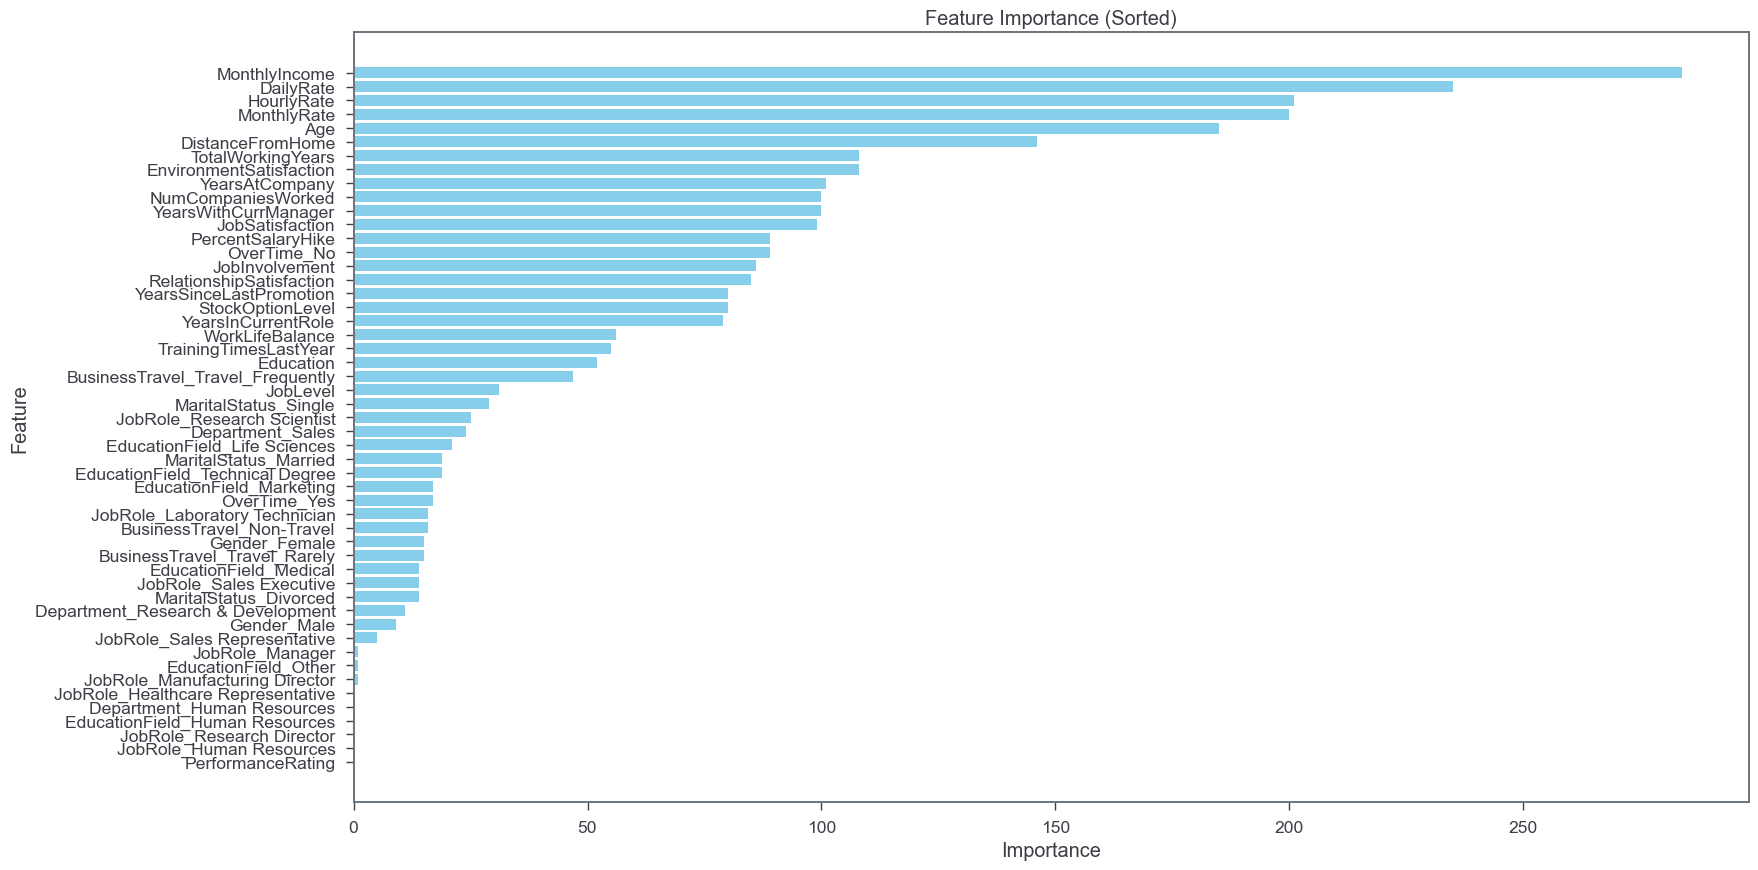

In [51]:
# Plot feature importance
# Sort feature importance values in descending order
feature_importance_sorted = feature_importance.sort_values(by='importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(18, 10))
plt.barh(feature_importance_sorted['feature'], feature_importance_sorted['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Sorted)')
plt.show()

In [ ]:
### Income has the most impact on employee attrition, then age and distance from home.
### We can use this information to benchmark the jobs within the organization to make sure that we are 
###     paying employees in accordance with the others in the same industry.
### For the distance from home, we could offer some telecommuting options depending on the job requirements.


### Finalize Model

### The next step would be to perform some hyperparamter tuning so we make sure the model is using the most optimal parameters. The final step is to place the model into production for the human resources department. 